# 1 Importing of dataset directly from kaggle to colab

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! kaggle datasets download jonathanoheix/face-expression-recognition-dataset

 88% 106M/121M [00:00<00:00, 145MB/s] 
100% 121M/121M [00:00<00:00, 146MB/s]


In [ ]:
! unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

# 2 IMAGE PREPROCESSING 

2.1 Importing required libraries

In [ ]:
import cv2
import numpy as np
import os
from numpy import min , max
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import minmax_scale
from pywt import swtn;             
from  glob  import glob;                   
from numpy import  dstack
from matplotlib.image import imread,imsave

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2.2 NORMALISATION OF IMAGES

In [ ]:

def normalization(image):
     Imax = max(image)
     Imin = min(image)
     return (image - Imin) / (Imax - Imin) ;

def startApp():
    SavePath = "/content/drive/MyDrive/newnoncovid" 
    ImagePath = "/content/drive/MyDrive/covid/NON-COVID/*.jpg"
    SWT_Level = 1
    AllImages = glob(ImagePath)
    print(AllImages)

    imagecount=0
    for imgName in AllImages:
        print(imgName)
        # Load the image
        image = cv2.imread(imgName);

        #Image Normalization
        image = normalization(image)
        print(np.array(image))
        print("imagecount")
        print(imagecount)
        imagecount=imagecount+1
        
        
        imsave(f'{SavePath}/{os.path.basename(imgName).replace("jpg","png")}',image)
if __name__ == "__main__":
    startApp()

    # [level4,extra]= swtn(image[:,:,3], wavelet="haar", level=SWT_Level, start_level=0, axes=None, trim_approx=True, norm=True)
    #rgb_image = dstack((level1,level2,level3,level4));

Streaming output truncated to the last 5000 lines.
  [0.83568075 0.83568075 0.83568075]
  [0.83568075 0.83568075 0.83568075]
  ...
  [0.97183099 0.97183099 0.97183099]
  [0.97652582 0.97652582 0.97652582]
  [0.71830986 0.71830986 0.71830986]]]
imagecount
59
/content/drive/MyDrive/covid/NON-COVID/Non-Covid (70).jpg
[[[0.76415094 0.76415094 0.76415094]
  [0.76886792 0.76886792 0.76886792]
  [0.75943396 0.75943396 0.75943396]
  ...
  [0.75943396 0.75943396 0.75943396]
  [0.77830189 0.77830189 0.77830189]
  [0.78301887 0.78301887 0.78301887]]

 [[0.75943396 0.75943396 0.75943396]
  [0.76886792 0.76886792 0.76886792]
  [0.76415094 0.76415094 0.76415094]
  ...
  [0.76415094 0.76415094 0.76415094]
  [0.77358491 0.77358491 0.77358491]
  [0.77830189 0.77830189 0.77830189]]

 [[0.76415094 0.76415094 0.76415094]
  [0.76886792 0.76886792 0.76886792]
  [0.77358491 0.77358491 0.77358491]
  ...
  [0.76415094 0.76415094 0.76415094]
  [0.75471698 0.75471698 0.75471698]
  [0.75471698 0.75471698 0.754716

2.3 AUGMENTATION OF IMAGES

In [ ]:
from numpy import fliplr , flipud , arange , asarray
from imutils import rotate_bound
from cv2 import imread , imwrite
from glob import glob
from scipy import ndimage

def image_affine_transform (image):
    height ,width , colors = image.shape
    transform = [[1,0,0],[0.5,1,0],[0,0,1]]
    return ndimage.affine_transform(image , transform ,offset = (0,-height//2 ,0),output_shape=(height , width+height //2 , colors))

def image_rotation(image,angle):
    rotated = rotate_bound(image, angle)
    return rotated

def h_flip(image):
    return fliplr(image)

def v_flip(image):
    return flipud(image)
   
images_path = '/content/drive/MyDrive/newnoncovid/*.png'
augmented_path ='/content/drive/MyDrive/augmentednoncovid' 

images=glob(images_path);
         
for image in images:
        image_number = 0 
        img=imread(image)
        for angle in arange(15,20,5):
            image_name = image.replace(".png","")
            img_rotate = image_rotation(img,angle)
            image_number += 1
            imsave(f'{augmented_path}/{os.path.basename(image_name)}aug{image_number}.png',img_rotate)
            img_hflip = h_flip(img)
            image_number += 1
            imsave(f'{augmented_path}/{os.path.basename(image_name)}aug{image_number}.png',img_hflip)
            img_aff_trans =image_affine_transform(img)
            image_number += 1
            imsave(f'{augmented_path}/{os.path.basename(image_name)}aug{image_number}.png',img_aff_trans)

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders # or import splitfolders
input_folder = "/content/drive/MyDrive/Augmentation"
output = "/content/drive/MyDrive/Split" 
splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.80, .0, .20))

Copying files: 936 files [00:08, 110.98 files/s]


2.3 IMAGE RESIZE TO 224*224

In [ ]:
train_path= '/content/drive/MyDrive/FacialEmotionDataset/images/train'
val_path='/content/drive/MyDrive/FacialEmotionDataset/images/validation'

x_train=[]
for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)


x_val=[]
for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)        


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.4 LABELING CLASSES AND SPLITTING DATA FOR TRAINING AND TESTING FOR VGG16 MODEL

In [ ]:
train_x=np.array(x_train)
val_x=np.array(x_val)

In [ ]:
np.save('/content/sample_data/images/train_x', train_x)

In [ ]:
np.save('/content/sample_data/images/val_x', val_x)

In [ ]:
train_x=np.load('/content/sample_data/images/train_x.npy')
val_x=np.load('/content/sample_data/images/val_x.npy')

In [ ]:
train_path= '/content/drive/MyDrive/FacialEmotionDataset/images_augmented/train'
val_path='/content/drive/MyDrive/FacialEmotionDataset/images_augmented/validation'


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')


val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 21082 images belonging to 7 classes.
Found 21198 images belonging to 7 classes.


In [ ]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
train_y=training_set.classes
val_y=val_set.classes
train_y.shape,val_y.shape

((28821,), (7066,))

# 3 Training and Testing Preprocessed FER Dataset using VGG16 CNN Model

In [ ]:
# Input Image Size
IMAGE_SIZE = [224, 224]

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:

#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(7, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

NameError: ignored

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
457/457 [==============================] - 86s 164ms/step - loss: 1.2120 - accuracy: 0.9448 - val_loss: 28.7384 - val_accuracy: 0.5959
Epoch 2/10
457/457 [==============================] - 76s 166ms/step - loss: 1.2339 - accuracy: 0.9428 - val_loss: 31.2753 - val_accuracy: 0.6020
Epoch 3/10
457/457 [==============================] - 77s 168ms/step - loss: 1.2320 - accuracy: 0.9454 - val_loss: 37.8735 - val_accuracy: 0.5373
Epoch 4/10
457/457 [==============================] - 78s 170ms/step - loss: 1.4609 - accuracy: 0.9410 - val_loss: 33.3845 - val_accuracy: 0.6277
Epoch 5/10
457/457 [==============================] - 78s 171ms/step - loss: 0.9856 - accuracy: 0.9567 - val_loss: 33.0210 - val_accuracy: 0.6184
Epoch 6/10
457/457 [==============================] - 78s 171ms/step - loss: 1.0068 - accuracy: 0.9580 - val_loss: 35.4513 - val_accuracy: 0.6020
Epoch 6: early stopping


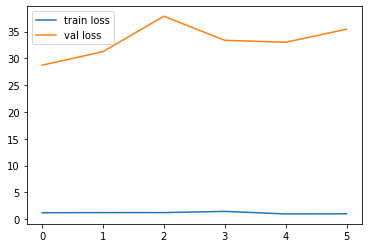

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('vgg-loss-rps-1.png')
plt.show()

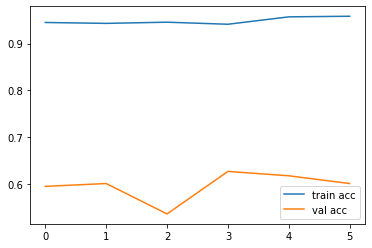

In [ ]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('vgg-acc-rps-1.png')
plt.show()

In [ ]:
model.evaluate(test_x,test_y,batch_size=32)

58/58 [==============================] - 10s 158ms/step - loss: 34.0264 - accuracy: 0.6215


[34.02642822265625, 0.6215183138847351]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
y_pred=model.predict(val_x)
y_pred=np.argmax(y_pred,axis=1)

58/58 [==============================] - 8s 135ms/step


In [ ]:
accuracy_score(y_pred,test_y)

0.6215182960131076

In [ ]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.49      0.58      0.53       340
           1       0.49      0.76      0.59        29
           2       0.66      0.53      0.59       516
           3       0.73      0.83      0.78       635
           4       0.48      0.39      0.43       311
           5       0.00      0.00      0.00         0

    accuracy                           0.62      1831
   macro avg       0.48      0.51      0.49      1831
weighted avg       0.62      0.62      0.62      1831



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_pred,test_y)

array([[199,  11,  63,  40,  41,   1],
       [  4,  19,   2,   0,   0,   0],
       [ 90,   8, 260,  59,  52,   0],
       [ 57,   4,  47, 555,  51,   1],
       [ 50,   3,  39,  63, 108,   4],
       [  0,   0,   0,   0,   0,   0]])

In [ ]:
model.save("/content/drive/MyDrive/FacialEmotionDataset/vgg-rps-final.h5")

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/FacialEmotionDataset/vgg-rps-final.h5')

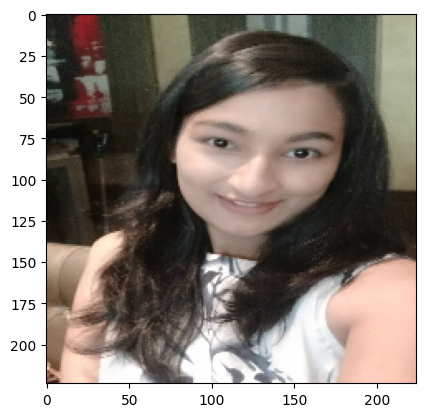

1/1 [==============================] - 0s 36ms/step
happy
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9998510e-01 1.4850612e-05
  0.0000000e+00 0.0000000e+00]]


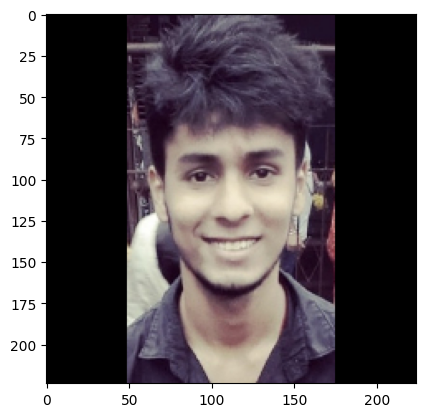

1/1 [==============================] - 0s 46ms/step
happy
[[0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 6.780846e-20
  0.000000e+00 0.000000e+00]]


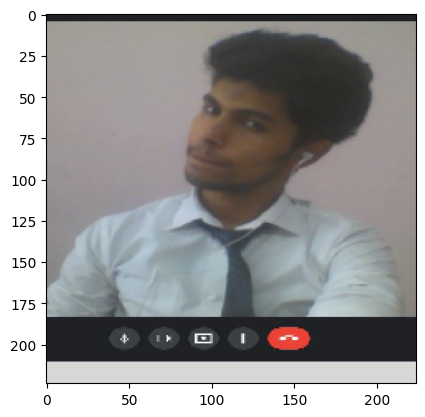

1/1 [==============================] - 0s 34ms/step
fear
[[0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 5.526911e-15
  0.000000e+00 0.000000e+00]]


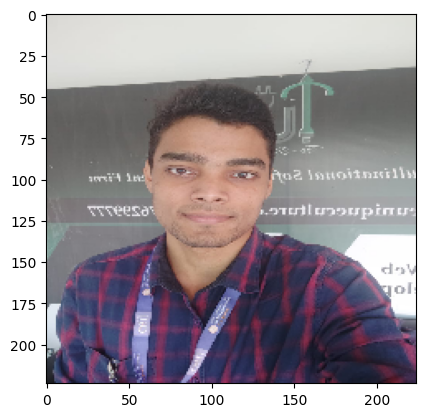

1/1 [==============================] - 0s 62ms/step
neutral
[[0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
path="/content/sample_data/images"
for img in os.listdir(path):
    img=image.load_img(path+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1) 
    if pred[0][0]>0.5:
        print("angry")
        print(pred);
    elif pred[0][1]>0.5:
        print("disgust")
        print(pred);
    elif pred[0][2]>0.5:
        print("fear")
        print(pred);
    elif pred[0][3]>0.5:
        print("happy")
        print(pred);
    elif pred[0][4]>0.5:
        print("neutral")
        print(pred);
    elif pred[0][5]>0.5:
        print("sad")
        print(pred);
    elif pred[0][6]>0.5:
        print("surprise")  
        print(pred);
    else:
        print("Unknown")

     